<a href="https://colab.research.google.com/github/rohit02bits/machineLearning/blob/master/Session2_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

In [0]:
transform = transforms.Compose ([transforms.ToTensor()])

trainset = MNIST (root = '/content/data/', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader (trainset, batch_size = 64, shuffle = True, num_workers = 2)

testset = MNIST (root = '/content/data/', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader (testset, batch_size = 64, shuffle = False, num_workers = 2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [0]:
dataiter = iter (trainloader)
images, labels = dataiter.next ()
print (type (images))
print (images.shape)
print (labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


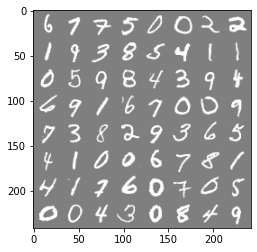

    6     7     7     5


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow (img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy ()
    plt.imshow (np.transpose (npimg, (1, 2, 0)))
    plt.show ()

# get some random training images
dataiter = iter (trainloader)
images, labels = dataiter.next ()

# show images
imshow (torchvision.utils.make_grid (images))
# print labels
print(' '.join ('%5s' % classes[labels[j]] for j in range (4)))

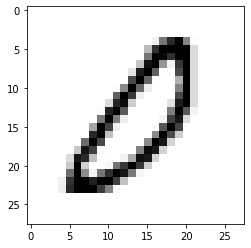

In [0]:
plt.imshow(images[4].numpy().squeeze(), cmap='gray_r');

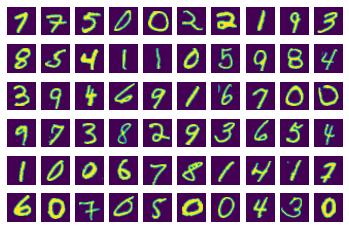

In [0]:
figure = plt.figure()
num_of_images = 60
for index in range (1, num_of_images + 1):
    plt.subplot (6, 10, index)
    plt.axis ('off')
    plt.imshow (images[index].numpy().squeeze())

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net (nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d (in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1, padding = 0) # 26x26x32
        self.conv2 = nn.Conv2d (in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 0) # 24x24x64
        self.conv3 = nn.Conv2d (in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 0) # 22x22x128
        self.pool1 = nn.MaxPool2d (2, 2) # 11x11x128

        self.conv4 = nn.Conv2d (in_channels = 128, out_channels = 256, kernel_size = 3, stride = 1, padding = 0) # 9x9x256
        self.conv5 = nn.Conv2d (in_channels = 256, out_channels = 512, kernel_size = 3, stride = 1, padding = 0) # 7x7x512
        self.conv6 = nn.Conv2d (in_channels = 512, out_channels = 1024, kernel_size = 3, stride = 1, padding = 0) # 5x5x1024
        self.conv7 = nn.Conv2d (in_channels = 1024, out_channels = 2048, kernel_size = 3, stride = 1, padding = 0) # 3x3x2048
        self.conv8 = nn.Conv2d (in_channels = 2048, out_channels = 10, kernel_size = 3, stride = 1, padding = 0) # 1x1x10

        self.linear = nn.Linear (in_features = 10, out_features = 10)

    def forward (self, x):
        x = F.relu (self.conv1 (x))
        x = F.relu (self.conv2 (x))
        x = F.relu (self.conv3 (x))
        x = self.pool1 (x)

        x = F.relu (self.conv8 (F.relu (self.conv7 (F.relu (self.conv6 (F.relu (self.conv5 (F.relu (self.conv4 (x))))))))))

        x = x.reshape (-1, 10 * 1 * 1)
        x = self.linear (x)

        return x

net = Net()

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)
net.to (device)

cuda


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1))
  (conv8): Conv2d(2048, 10, kernel_size=(3, 3), stride=(1, 1))
  (linear): Linear(in_features=10, out_features=10, bias=True)
)

In [0]:
import time
import torch.optim as optim
from tqdm import notebook

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.003, momentum=0.9)
#time0 = time.now ()
epochs = 2

tqdm_e = notebook.tqdm ([i + 1 for i in range (epochs)], total = epochs)
for i, e in enumerate (tqdm_e):
    running_loss = 0

    tqdm_tl = notebook.tqdm (trainloader, total = int (len (trainloader)))
    for images, labels in (tqdm_tl):
    #for images, labels in trainloader:
        # Training pass
        optimizer.zero_grad()
        
        output = net (images.cuda())
        loss = criterion (output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
#print("\nTraining Time (in minutes) =",(time.now ()-time0)/60)


Epoch 1 - Training loss: 0.00997425151913405



Epoch 2 - Training loss: 0.007779357120839518



In [0]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


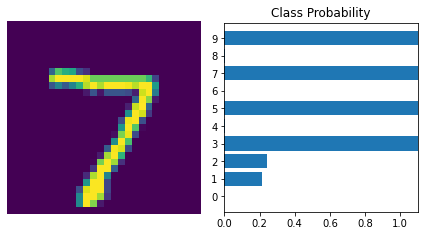

In [0]:
images, labels = next (iter (testloader))

img = images
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = net (img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp (logps)
probab = list (ps.cpu().numpy()[0])
print ("Predicted Digit =", probab.index (max (probab)))
view_classify (img[0], ps[0])

In [0]:
correct_count, all_count = 0, 0
tqdm_vl = notebook.tqdm (testloader, total = int (len (testloader)))
for images, labels in tqdm_vl:
  for i in range (len (labels)):
    with torch.no_grad():
        logps = net(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))


Number Of Images Tested = 10000

Model Accuracy = 0.1028
